In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

%matplotlib inline
plt.style.use('fivethirtyeight')

df = pd.read_csv('https://datahub.io/core/covid-19/r/countries-aggregated.csv', parse_dates=['Date'])
df['Total Cases'] = df[['Confirmed', 'Recovered', 'Deaths']].sum(axis=1)

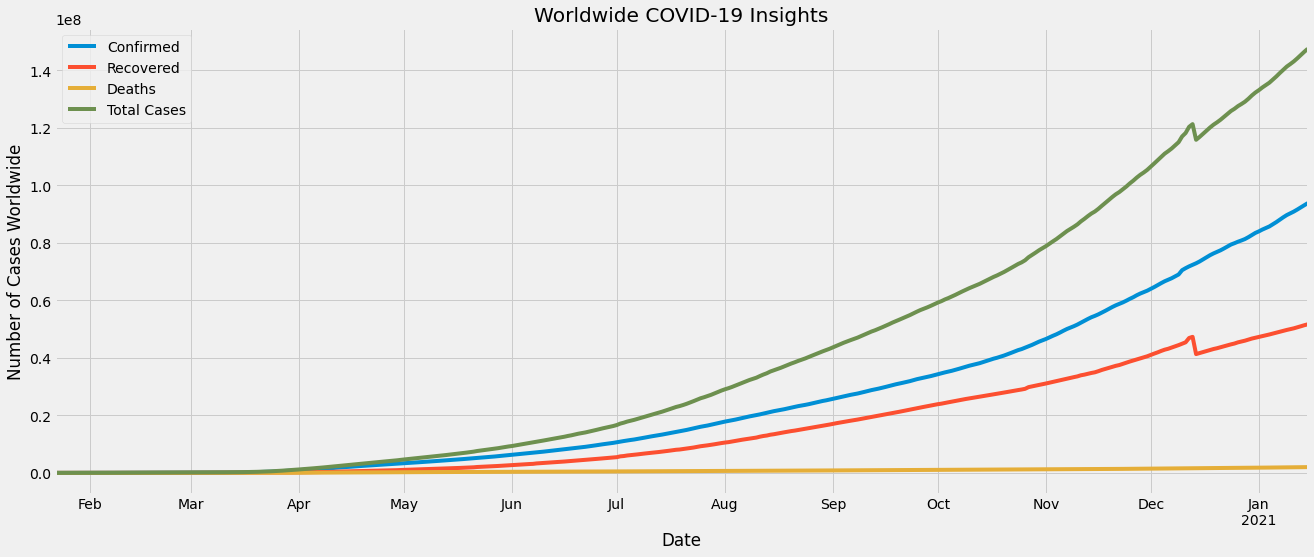

In [103]:
# Worldwide Cases

worldwide_df = df.groupby(['Date']).sum()
w = worldwide_df.plot(figsize=(20, 8))
w.set_xlabel('Date')
w.set_ylabel('Number of Cases Worldwide')
w.title.set_text('Worldwide COVID-19 Insights')

plt.show()

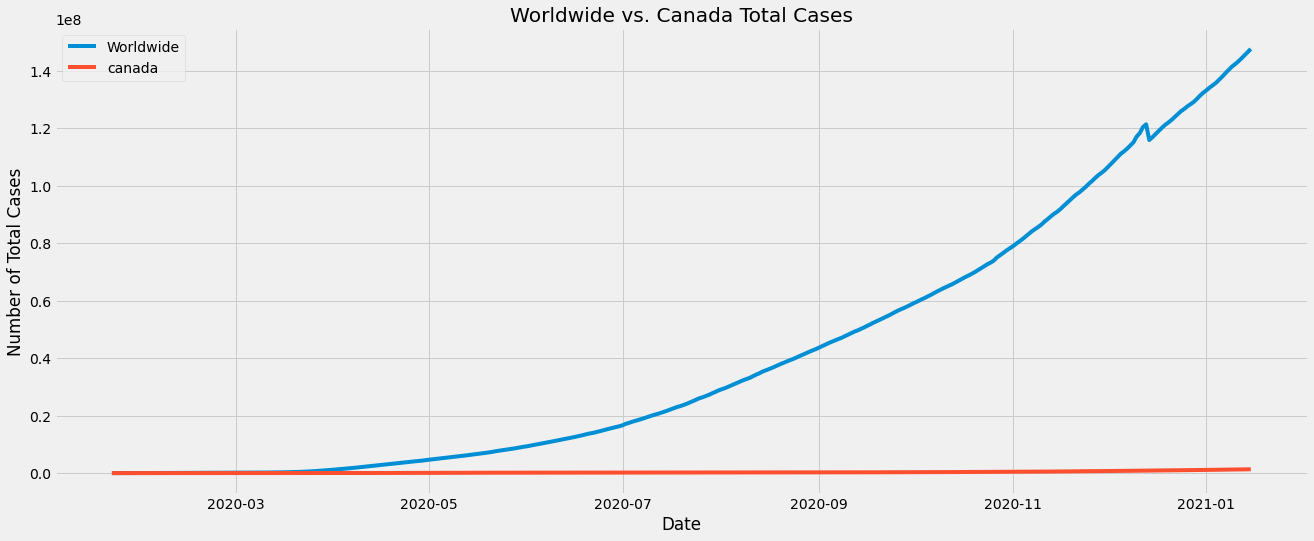

In [104]:
# country = input('Enter the name of a country (for america enter "US")')

ca_df = df[df['Country']==f'Canada'].groupby(['Date']).sum()

fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(111)

ax.plot(worldwide_df[['Total Cases']], label='Worldwide')
ax.plot(ca_df[['Total Cases']], label=f'canada')
ax.set_xlabel('Date')
ax.set_ylabel('Number of Total Cases')
ax.title.set_text(f'Worldwide vs. Canada Total Cases')

plt.legend(loc='upper left')
plt.show()

0         NaN
1         0.0
2         0.0
3         0.0
4         1.0
        ...  
355    8325.0
356    6141.0
357    7139.0
358    7447.0
359    6880.0
Name: Daily Confirmed, Length: 360, dtype: float64


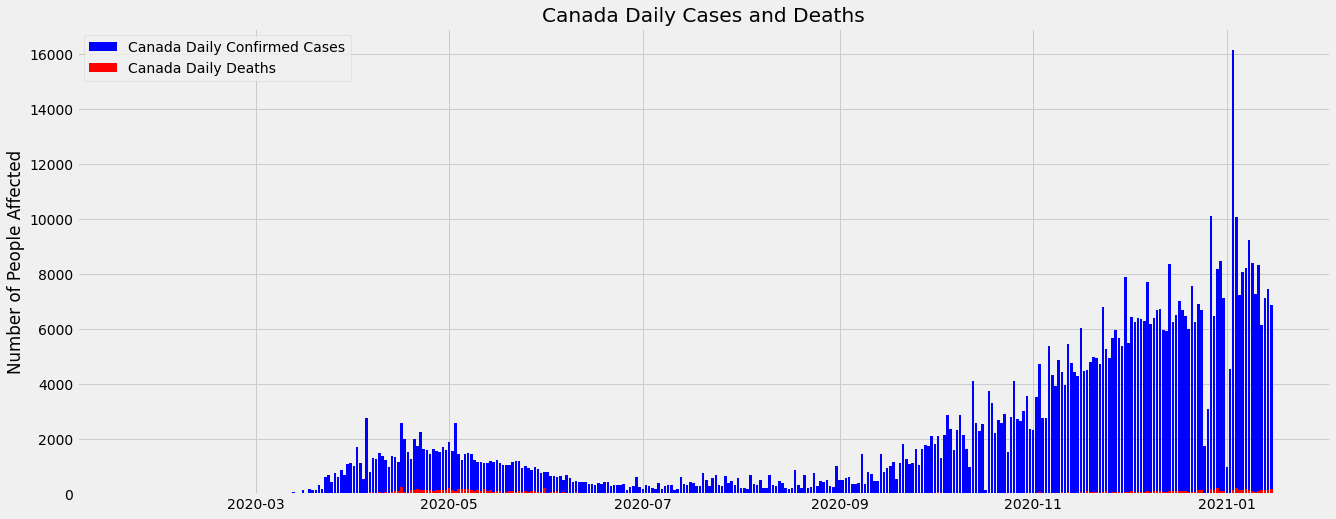

In [105]:
# Canada Daily Cases and Deaths
ca_df = ca_df.reset_index()
ca_df['Daily Confirmed'] = ca_df['Confirmed'].sub(ca_df['Confirmed'].shift())
ca_df['Daily Deaths'] = ca_df['Deaths'].sub(ca_df['Deaths'].shift())

fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(111)

ax.bar(ca_df['Date'], ca_df['Daily Confirmed'], color='b', label=f'Canada Daily Confirmed Cases')
print(ca_df['Daily Confirmed'])
ax.bar(ca_df['Date'], ca_df['Daily Deaths'], color='r', label=f'Canada Daily Deaths')
ax.set_ylabel('Number of People Affected')
ax.title.set_text(f'Canada Daily Cases and Deaths')

plt.legend(loc='upper left')
plt.show()

In [106]:
from datetime import date, timedelta